# Ham or Spam
## In this projcet, we will build a algorithm which can find a message whether spam or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/spam.csv', encoding='iso-8859-1') # read the data

In [3]:
df.head() # show the first 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe() # show the summary statistics

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.info() # show the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
import neattext as nt

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True) # drop the columns
df.rename(columns={'v1': 'class', 'v2': 'text'}, inplace=True) # rename the columns
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
total = ' '.join(df["text"]) # join all the text

In [9]:
sent = nt.TextFrame(total) # create a text frame
sent.describe() # show the summary statistics

Key      Value          
Length  : 451993         
vowels  : 123893         
consonants: 203282         
stopwords: 36082          
punctuations: 22903          
special_char: 23446          
tokens(whitespace): 86335          
tokens(words): 90106          


In [10]:
sent.length # show the length of the text

451993

In [11]:
sent.head(30) # show the first 5 rows

'Go until jurong point, crazy..'

In [12]:
sent.count_vowels() # count the number of vowels

{'a': 25248, 'e': 34934, 'i': 22439, 'o': 28962, 'u': 12310}

In [13]:
sent.count_stopwords() # count the number of stopwords

{'go': 262,
 'until': 27,
 'only': 183,
 'in': 855,
 'there': 135,
 'a': 1419,
 'to': 2226,
 'may': 43,
 'say': 80,
 'so': 423,
 'already': 48,
 'then': 205,
 'i': 2208,
 "don't": 134,
 'he': 180,
 'around': 53,
 'here': 79,
 'though': 16,
 "it's": 96,
 'been': 128,
 'now': 247,
 'and': 967,
 'no': 257,
 'some': 118,
 'you': 1917,
 'up': 262,
 'for': 697,
 'it': 465,
 'even': 61,
 'my': 751,
 'is': 862,
 'not': 404,
 'with': 377,
 'they': 124,
 'me': 605,
 'as': 176,
 'per': 56,
 'your': 676,
 'has': 115,
 'all': 259,
 'have': 568,
 'call': 557,
 'had': 100,
 'or': 414,
 'the': 1317,
 'on': 520,
 'be': 375,
 'about': 156,
 'this': 312,
 'enough': 22,
 'six': 4,
 'from': 277,
 'won': 64,
 'our': 142,
 'take': 124,
 'will': 374,
 'at': 398,
 'next': 60,
 'how': 253,
 'his': 57,
 'make': 101,
 'if': 378,
 'its': 207,
 'that': 468,
 'first': 50,
 'when': 282,
 'down': 48,
 'can': 385,
 'just': 363,
 'myself': 9,
 'really': 80,
 'always': 54,
 'did': 115,
 'are': 485,
 'an': 112,
 'over': 5

In [14]:
sent.count_consonants() # count the number of consonants

{'b': 5310,
 'c': 8876,
 'd': 11275,
 'f': 5745,
 'g': 8284,
 'h': 14204,
 'j': 935,
 'k': 4533,
 'l': 15757,
 'm': 10573,
 'n': 21738,
 'p': 6811,
 'q': 236,
 'r': 17738,
 's': 18898,
 't': 27921,
 'v': 3504,
 'w': 8462,
 'x': 1586,
 'y': 10396,
 'z': 500}

In [15]:
sent.readability() # show the readability

{'automated readability': 6.9861830850031055,
 'description': '12-13 years (Seventh Grade)'}

In [16]:
import nltk 
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids() # show the file ids

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\bugra\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [17]:
# sheakespeare-macbeth.txt readability
sh = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')
sh = nt.TextFrame(sh)
sh.readability()


{'automated readability': 13.40177050724963,
 'description': '18-24 years (College student)'}

In [18]:
sh.describe() # show the summary statistics

Key      Value          
Length  : 100351         
vowels  : 29039          
consonants: 46278          
stopwords: 7895           
punctuations: 4789           
special_char: 4789           
tokens(whitespace): 17741          
tokens(words): 18353          


<Axes: xlabel='class', ylabel='count'>

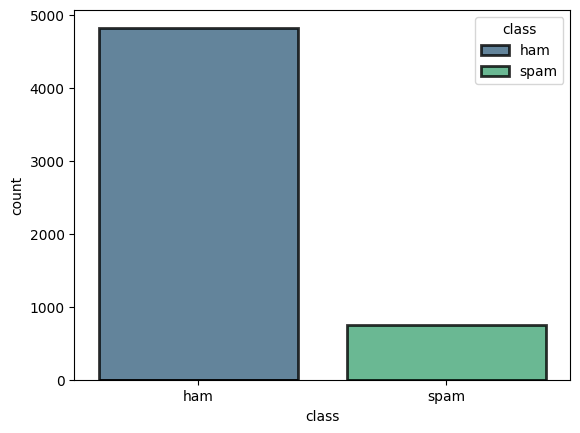

In [19]:
sns.countplot(x= df['class'],palette='viridis',hue=df['class'], dodge=False, edgecolor='black', linewidth=2, alpha=0.8, saturation=0.75) # countplot

### We will use SMOTE later, bcz of the difference between number of ham/spam 

In [20]:
from imblearn.over_sampling import SMOTE
# x = SMOTE().fit_resample(x,y)

In [21]:
df["text"]=  df["text"].str.lower() # convert to lowercase
df["text"]=  df["text"].str.replace('[^\w\s]','',regex=True) # remove punctuation
df["text"]=  df["text"].str.replace('\d+', '',regex=True) # remove digits
df["text"]=  df["text"].str.replace('\n', '',regex=True) # remove new line
df["text"]=  df["text"].str.replace('\r', '',regex=True) # remove carriage return

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [23]:
clf = Pipeline([    
    ('tfidf', TfidfVectorizer()),    
    ('clf', RandomForestClassifier())])

In [24]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [26]:
y_pred = clf.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9669777458722182


In [28]:
print('Classification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1202
        spam       1.00      0.76      0.86       191

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [29]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1202    0]
 [  46  145]]


### What is svm ?  
* Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. 

In [30]:
from sklearn.svm import SVC
svm = Pipeline([    
    ('tfidf', TfidfVectorizer()),    
    ('clf', SVC())])

In [31]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [32]:
y_pred = svm.predict(X_test)

In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9763101220387652


In [34]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1202
        spam       1.00      0.83      0.91       191

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [35]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1202    0]
 [  33  158]]


<Axes: >

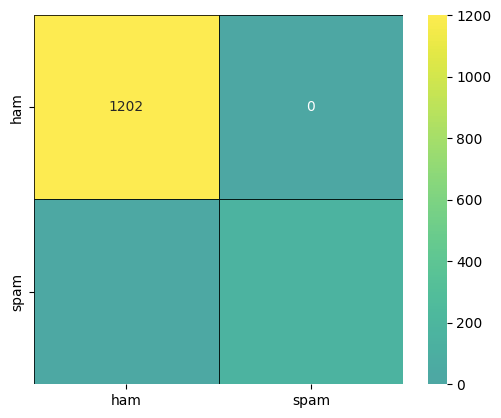

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d', cbar=True, linewidths=0.5, linecolor='black', square=True, xticklabels=clf.classes_, yticklabels=clf.classes_, alpha=0.8, center=0)

In [37]:
test1 = ['Congratulations! You have won a free ticket to the USA this summer. Text "WIN" to 12345 to claim your prize.']
test2 = ['Hello, how are you doing today?']
test3 = ['You have been selected for a job interview.']
test4 = ['You have been selected for a job interview. Text "YES" to 12345 to confirm your attendance.']
test5 = ['Please click on the link to confirm your email address.']
test6 = ['Please click on the link to get new food coupons.']

In [38]:
svm.predict(test1), svm.predict(test2), svm.predict(test3), svm.predict(test4), svm.predict(test5), svm.predict(test6)

(array(['spam'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object))

In [39]:
clf.predict(test1), clf.predict(test2), clf.predict(test3), clf.predict(test4), clf.predict(test5), clf.predict(test6)

(array(['spam'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object),
 array(['ham'], dtype=object))

In [40]:
df["text"][2]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [41]:
svm.predict([df["text"][2]]), clf.predict([df["text"][2]])

(array(['spam'], dtype=object), array(['spam'], dtype=object))

### Solve the imbalanced problem

In [42]:
ham = df[df['class'] == 'ham']
spam = df[df['class'] == 'spam']

* we can use undersampling to balance the data.
* or we can use SMOTE to balance the data
### Data augmentation : Synthetic Minority Over-sampling Technique (SMOTE)
* Creating new data with using our data.

In [43]:
from wordcloud import WordCloud # wordcloud is a library for creating word clouds
from wordcloud import STOPWORDS # stopwords are the words that are not important
from PIL import Image # PIL is the Python Imaging Library

In [44]:
ham_text = ' '.join(ham['text'])
spam_text = ' '.join(spam['text'])

ham_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(ham_text)

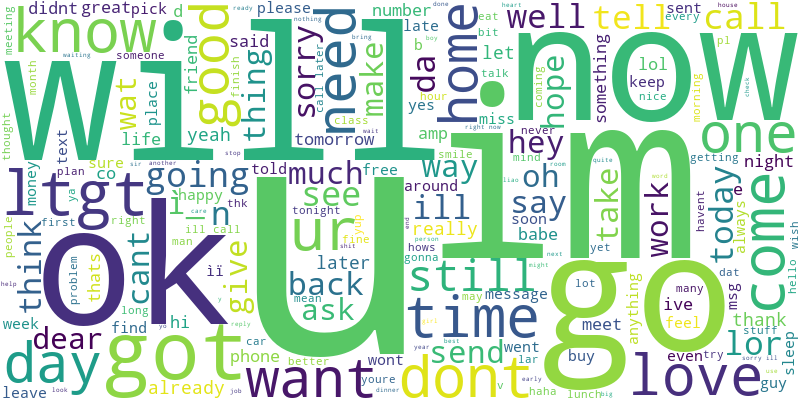

In [45]:
ham_wordcloud.to_image()

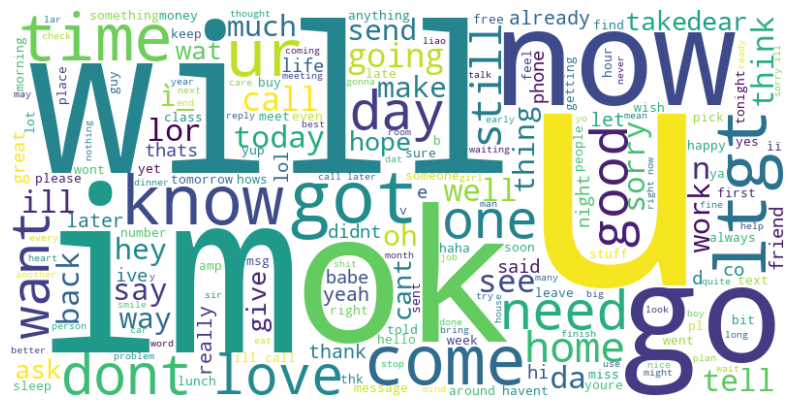

In [46]:
def plot_wordcloud(data,color) :
    plt.figure(figsize=(10, 10))
    wc = WordCloud(width=800, height=400, background_color=color , stopwords=STOPWORDS).generate(data)
    # mask = np.array(Image.open('cloud.png'))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(ham_text, 'white')

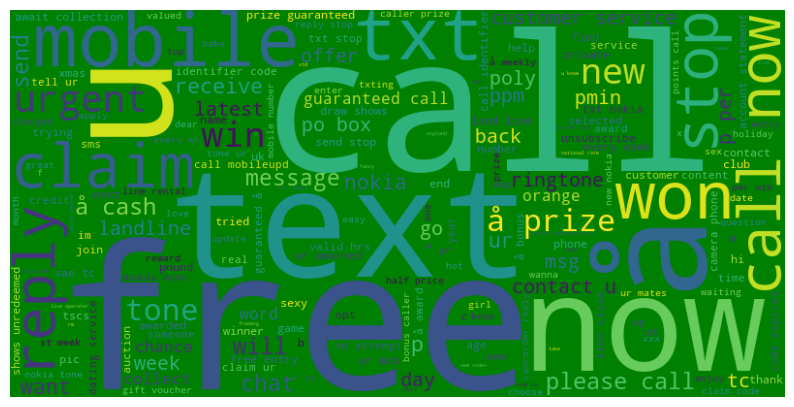

In [47]:
plot_wordcloud(spam_text, 'green')

In [48]:
spam.shape, ham.shape

((747, 2), (4825, 2))

In [49]:
spam = spam.sample(ham.shape[0], replace=True)

In [50]:
data = pd.concat([ham, spam],ignore_index=True)
data.shape

(9650, 2)

In [51]:
data.head()

,class,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives aroun...
4,ham,even my brother is not like to speak with me t...


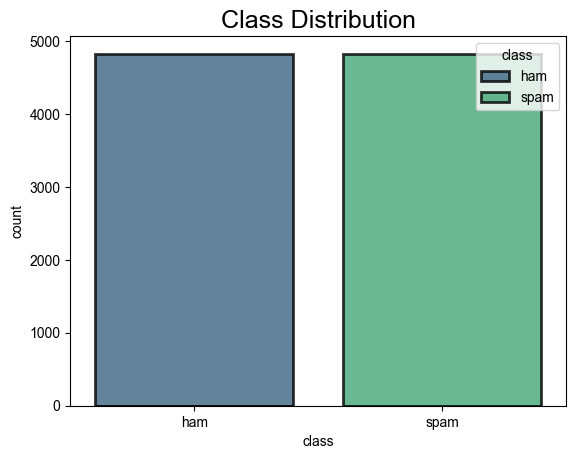

In [52]:
sns.countplot(x =data['class'],palette='viridis', dodge=False, edgecolor='black', linewidth=2, alpha=0.8, saturation=0.75, data=data , hue=data['class']);
sns.set(style='whitegrid')
sns.set_context('talk')
plt.title('Class Distribution');


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.25, random_state=42)

In [54]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [55]:
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.998756734355574


### Sentiment analysis

* Sentiment analysis is the process of analyzing text data to determine the sentiment of the text.

In [56]:
from textblob import TextBlob

In [57]:
blob = TextBlob("I hate you!")
blob.sentiment  
# blob.sentiment.polarity
# blob.sentiment.subjectivity

Sentiment(polarity=-1.0, subjectivity=0.9)

In [58]:
blob = TextBlob("Istanbul is big city")
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [59]:
df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,class,text,sentiment
0,ham,go until jurong point crazy available only in ...,0.15
1,ham,ok lar joking wif u oni,0.50
2,spam,free entry in a wkly comp to win fa cup final...,0.40
3,ham,u dun say so early hor u c already then say,0.10
4,ham,nah i dont think he goes to usf he lives aroun...,0.00


### Top used words

In [60]:
# from collections import Counter

# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# common_words = get_top_n_words(df['text'], 20)

# df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

# plt.figure(figsize=(10, 10))

# sns.barplot(x='count', y='text', data=df1, palette='viridis', dodge=False, edgecolor='black', linewidth=2, alpha=0.8, saturation=0.75)

# plt.title('Top 20 words in the text')

# plt.show()


## Spacy

In [61]:
# !python -m spacy download en_core_web_sm

In [62]:
import spacy

+ Tokenization
+ Named entity recognition
+ Topic modelling
+ Part Of Speech tagging
+ Lemma and Stemming

### Tokenization

In [63]:
nlp = spacy.load('en_core_web_sm')

In [64]:
s1 = '''If the time has come to set sail,
A ship departs this port for the unknown. 
It departs in silence , as if it had no passengers;
Neither a handkerchief nor an arm is wawed in its departure.'''

In [65]:
doc1 = nlp(s1)

In [66]:
s1.split()

['If',
 'the',
 'time',
 'has',
 'come',
 'to',
 'set',
 'sail,',
 'A',
 'ship',
 'departs',
 'this',
 'port',
 'for',
 'the',
 'unknown.',
 'It',
 'departs',
 'in',
 'silence',
 ',',
 'as',
 'if',
 'it',
 'had',
 'no',
 'passengers;',
 'Neither',
 'a',
 'handkerchief',
 'nor',
 'an',
 'arm',
 'is',
 'wawed',
 'in',
 'its',
 'departure.']

In [67]:
s1_list = [x for x in doc1]

In [68]:
s1_list

[If,
 the,
 time,
 has,
 come,
 to,
 set,
 sail,
 ,,
 ,
 A,
 ship,
 departs,
 this,
 port,
 for,
 the,
 unknown,
 .,
 ,
 It,
 departs,
 in,
 silence,
 ,,
 as,
 if,
 it,
 had,
 no,
 passengers,
 ;,
 ,
 Neither,
 a,
 handkerchief,
 nor,
 an,
 arm,
 is,
 wawed,
 in,
 its,
 departure,
 .]

In [69]:
[x.lemma_ for x in doc1]    

['if',
 'the',
 'time',
 'have',
 'come',
 'to',
 'set',
 'sail',
 ',',
 '\n',
 'a',
 'ship',
 'depart',
 'this',
 'port',
 'for',
 'the',
 'unknown',
 '.',
 '\n',
 'it',
 'depart',
 'in',
 'silence',
 ',',
 'as',
 'if',
 'it',
 'have',
 'no',
 'passenger',
 ';',
 '\n',
 'neither',
 'a',
 'handkerchief',
 'nor',
 'an',
 'arm',
 'be',
 'wawe',
 'in',
 'its',
 'departure',
 '.']

In [70]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [71]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_)

Apple Apple PROPN NNP
is be AUX VBZ
looking look VERB VBG
at at ADP IN
buying buy VERB VBG
U.K. U.K. PROPN NNP
startup startup NOUN NN
for for ADP IN
$ $ SYM $
1 1 NUM CD
billion billion NUM CD


In [72]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

### Named entity recognition 
* (NER) is the process of detecting named entities in text and classifying them into predefined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

In [73]:
text = "When Zafer started working on self-driving cars at Stanford in 2005, few people outside of academia took him seriously. But Thrun, who led the Stanford Racing Team, was convinced that autonomous vehicles could be a reality. In 2005, Thrun and his team at Stanford built a robotic Volkswagen Touareg that could drive itself. The car used a combination of sensors, cameras, and software to navigate the desert terrain of the DARPA Grand Challenge. The car successfully completed the 132-mile course in less than seven hours, finishing in second place. The success of the Stanford Racing Team helped to launch the self-driving car industry. Today, companies like Waymo, Tesla, and Uber are developing autonomous vehicles that could change the way we travel."
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)